**Akshat Aggarwal**

**E22CSEU0020**

**Question:-1**

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson

[*********************100%***********************]  1 of 1 completed


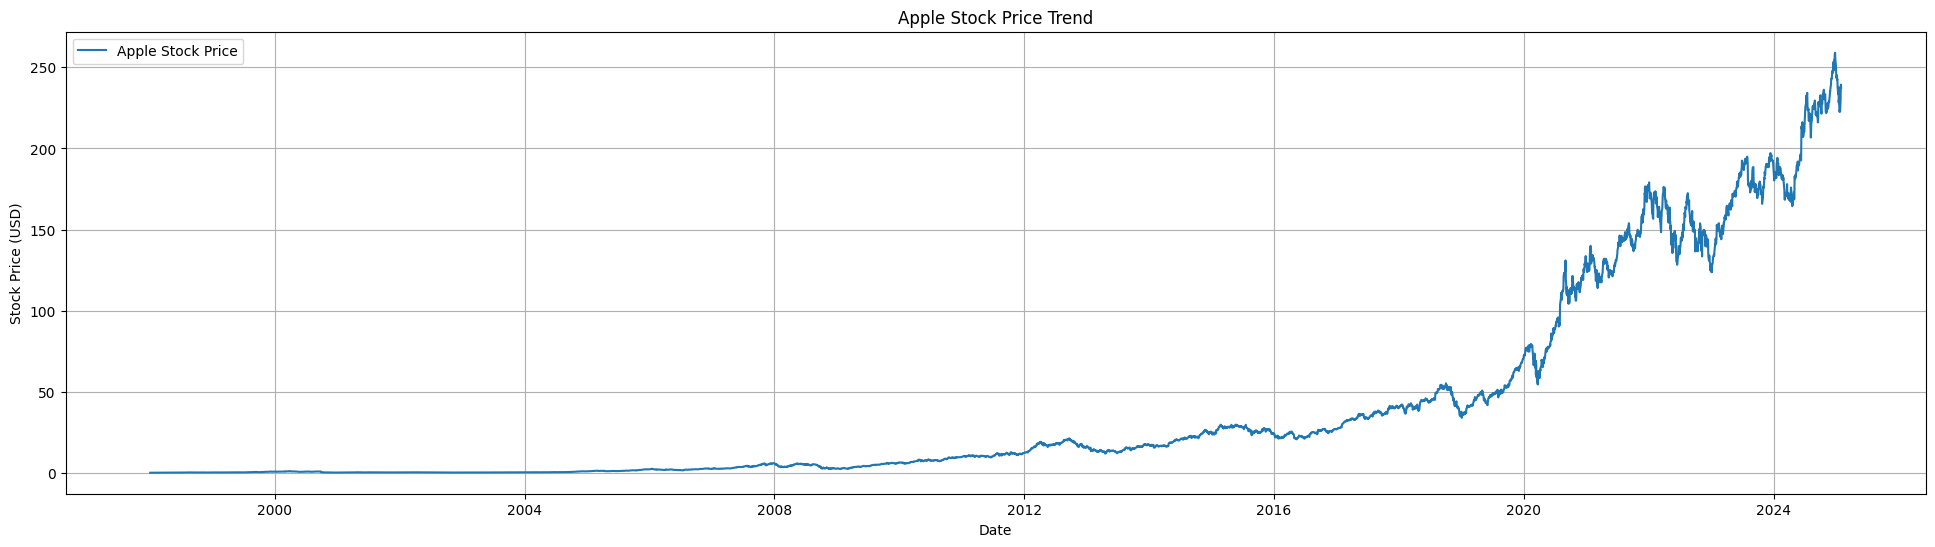

In [8]:
apple_stock = yf.download('AAPL', start='1998-01-01', end='2025-01-31')
plt.figure(figsize=(24, 6))
plt.plot(apple_stock['Close'], label="Apple Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Apple Stock Price Trend")
plt.legend()
plt.grid()
plt.show()

**Question:-2**

<Figure size 1000x500 with 0 Axes>

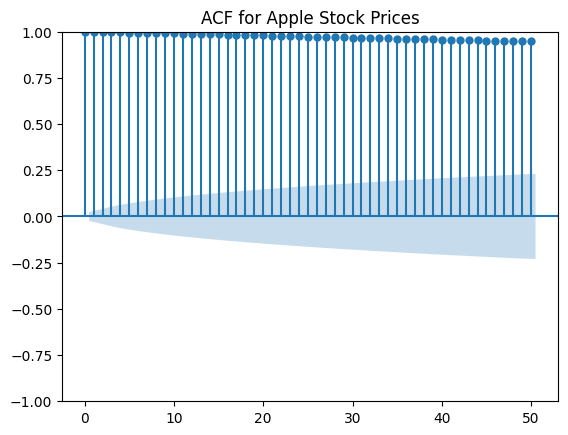

In [3]:
#Plotting for ACF
plt.figure(figsize=(10, 5))
plot_acf(apple_stock['Close'].dropna(), lags=50)
plt.title("ACF for Apple Stock Prices")
plt.show()

**Question:-3**

In [4]:
#Checking ADF results
result = adfuller(apple_stock['Close'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 2.8608009187419947
p-value: 1.0


Applying differencing...


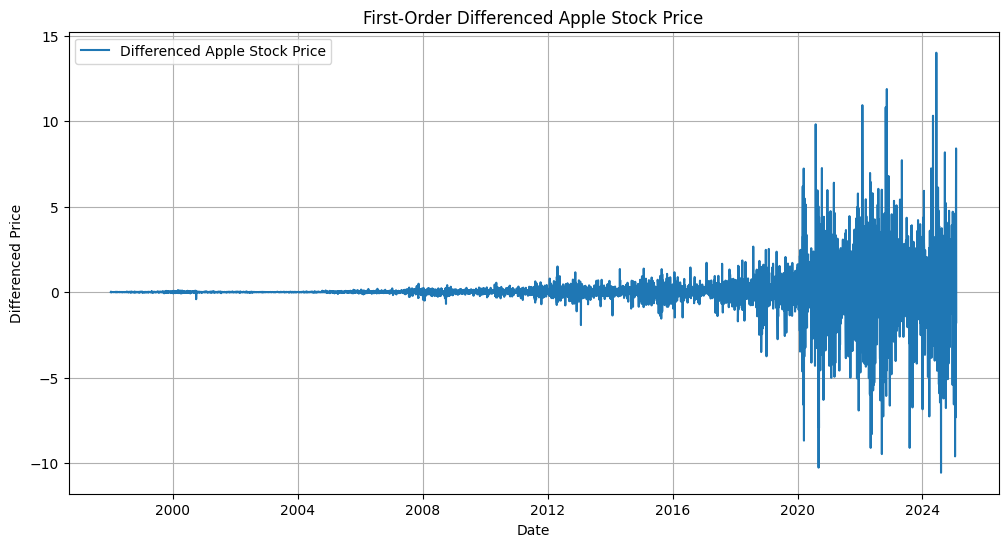

ADF Statistic after differencing: -15.314336187936984
p-value after differencing: 4.145384334468838e-28
The time series is now stationary after differencing.


In [5]:
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("Applying differencing...")

    # Applying first-order differencing
    apple_stock['Close_diff'] = apple_stock['Close'].diff()

    # Plotting differenced series
    plt.figure(figsize=(12, 6))
    plt.plot(apple_stock['Close_diff'].dropna(), label="Differenced Apple Stock Price")
    plt.xlabel("Date")
    plt.ylabel("Differenced Price")
    plt.title("First-Order Differenced Apple Stock Price")
    plt.legend()
    plt.grid()
    plt.show()

    # Re-running ADF Test
    result_diff = adfuller(apple_stock['Close_diff'].dropna())
    print(f'ADF Statistic after differencing: {result_diff[0]}')
    print(f'p-value after differencing: {result_diff[1]}')

    if result_diff[1] < 0.05:
        print("The time series is now stationary after differencing.")

**Question:-4**

In [6]:
dw_statistic = durbin_watson(apple_stock['Close'].dropna())
print(f'Durbin-Watson Statistic: {dw_statistic}')


Durbin-Watson Statistic: [0.00028514]
